<a href="https://colab.research.google.com/github/robertaalfrinasimanjuntak/Project-Akhir-Data-Science-Batch-34/blob/main/Stage_02_DataWhiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#STAGE 02 - DataWhiz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cek file apa saja yang ada dalam path '../My Drive/Data/Banking Dataset'
import os

drive_dir = '/content/drive/My Drive/Data/Banking Dataset'
contents = os.listdir(drive_dir)

for item in contents:
    print(item)

FileNotFoundError: ignored

In [ ]:
import pandas as pd

# Tentukan path lengkap ke file csv
train_path = '/content/drive/My Drive/Data/Banking Dataset/train.csv'
test_path = '/content/drive/My Drive/Data/Banking Dataset/test.csv'
# Baca file csv ke dalam DataFrame
df_train = pd.read_csv(train_path, delimiter = ";")
df_test = pd.read_csv(test_path, delimiter = ";")

df = pd.concat([df_train, df_test], ignore_index=True) # Data yang telah digabung

df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4494,37,admin.,married,secondary,no,1283,yes,no,unknown,20,may,209,1,-1,0,unknown,no
38066,34,blue-collar,single,tertiary,no,97,no,no,cellular,14,may,67,3,-1,0,unknown,no
24080,56,technician,married,secondary,no,589,yes,no,unknown,23,oct,518,1,147,2,success,yes
9704,39,technician,single,unknown,no,75,no,no,unknown,6,jun,26,1,-1,0,unknown,no
10888,35,blue-collar,single,secondary,no,507,no,no,unknown,17,jun,43,6,-1,0,unknown,no


#1. Data Cleansing (50 poin)
Lakukan pembersihan data, sesuai yang diajarkan di kelas, seperti:
  
  A. Handle missing values
  
  B. Handle duplicated data
  
  C. Handle outliers
  
  D. Feature transformation
  
  E. Feature encoding
  
  F. Handle class imbalance

Di laporan homework, tuliskan apa saja yang telah dilakukan dan metode yang digunakan.
* Tetap tuliskan jika memang tidak ada yang perlu di-handle (contoh: “Tidak perlu feature
encoding karena semua feature sudah numerical” atau “Outlier tidak di-handle karena
akan fokus menggunakan model yang robust terhadap outlier”).

##Deskripsi Data
berdasarkan proses exploratory data analysis di Stage 01, terdapat informasi sebagai berikut:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


## Detailed Column Descriptions
### bank client data:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

### related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

### other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None

In [ ]:
nums = ['age','balance','day','duration','campaign','pdays','previous'] #numerical
cats = ['job', 'marital', 'contact', 'poutcome'] #categorical
binary = ["default", "housing", "loan", "y"] #binary
ords = ['education', 'month'] #ordinal

In [ ]:
df[nums].describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Hasil Eksplorasi Data Numerik
| Field     |Deskripsi                                      |
|-----------|-----------------------------------------------|
| age       | Rentang umur berada di angka 18 - 95 tahun, sebaran umur bersifat normal.                   |
| balance   | <b>Terdapat balance yang bernilai negatif (tidak normal)</b>.                                    |
|           | Treatment untuk nilai negatif: hapus, ganti dengan mean, median, mode, atau dibuat nol.   |
| day       | Berupa tanggal kontak terakhir dalam suatu bulan, tanpa tanggal anomali.                     |
| duration  | Lamanya durasi pemanggilan (dalam detik).                                                 |
|           | Nilai 0 bisa diartikan panggilan tidak diangkat.                                         |
| campaign  | Banyaknya kontak yang dilakukan terhadap klien.                                           |
|           | <b>Nilai maksimal hingga 63, ada banyak outlier.</b>                                           |
| pdays     | Lamanya waktu (dalam hari) terakhir kali klien dihubungi.                                |
|           | Nilai -1 artinya belum pernah dihubungi sebelumnya.                                     |
|           | <b>Banyak data bernilai -1, artinya banyak klien yang baru dihubungi pertama kali.</b>         |
| previous  | Banyaknya kontak terdahulu sebelum pemanggilan saat ini.                                 |
|           | <b>Lebih dari 75% data bernilai 0, artinya banyak klien baru pertama kali dihubungi.</b>       |


## Deskripsi dari data kategorikal, boolean dan ordinal

In [ ]:
# Data kategorik
df[cats].describe()

,job,marital,contact,poutcome
count,49732,49732,49732,49732
unique,12,3,3,4
top,blue-collar,married,cellular,unknown
freq,10678,30011,32181,40664


In [ ]:
# Data boolean
df[binary].describe()

,default,housing,loan,y
count,49732,49732,49732,49732
unique,2,2,2,2
top,no,yes,no,no
freq,48841,27689,41797,43922


In [ ]:
# Data ordinal
df[ords].describe()

,education,month
count,49732,49732
unique,4,12
top,secondary,may
freq,25508,15164


In [ ]:
df.isna().sum() # Mencari data yang hilang pada tiap kolom

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

*italicized text* ##Handle Missing Data

Bisa dilihat bahwa data train yang dipakai, tidak memiliki kolom dengan data yang kosong sehingga bisa dilanjutkan ke step selanjutnya.

## Handle Duplicated Data

In [ ]:
df.duplicated().sum() #Mencari duplikat dalam DataFrame

4521

In [ ]:
df.duplicated(subset=['age','balance','day','duration','campaign','pdays','previous', 'job']).sum()

4521

In [ ]:
duplicates = df[df.duplicated()]
print("Baris-baris yang duplikat:")
print(duplicates)

Baris-baris yang duplikat:
       age            job  marital  education default  balance housing loan  \
45211   30     unemployed  married    primary      no     1787      no   no   
45212   33       services  married  secondary      no     4789     yes  yes   
45213   35     management   single   tertiary      no     1350     yes   no   
45214   30     management  married   tertiary      no     1476     yes  yes   
45215   59    blue-collar  married  secondary      no        0     yes   no   
...    ...            ...      ...        ...     ...      ...     ...  ...   
49727   33       services  married  secondary      no     -333     yes   no   
49728   57  self-employed  married   tertiary     yes    -3313     yes  yes   
49729   57     technician  married  secondary      no      295      no   no   
49730   28    blue-collar  married  secondary      no     1137      no   no   
49731   44   entrepreneur   single   tertiary      no     1136     yes  yes   

        contact  day mon

In [ ]:
df_1 = df.drop_duplicates() # Menghapus duplikat
df_1.duplicated().sum()

0

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


Hasil pencarian duplikat, terdapat duplikat dalam data. Maupun mencari duplikat dengan cara  menggunakan subset, hasilnyapun terdapat duplikat. Maka langkah selanjutnya adalah menghapus data duplikat dengan jumlah data sebanyak 4521. Stelah menghapus duplikat maka selanjutnya adalah transformasi data

## Transformation Data

### Log Transformation

In [ ]:
df_a = df_1.copy() # Mengcopy data yang bebas duplikat
df_a[df_a["balance"] <= 0]["y"].describe()

count     7280
unique       2
top         no
freq      6778
Name: y, dtype: object

In [ ]:
#2 Menghapus data dengan balance mulai dari 0 sampai balance negatif
df_b = df_a.drop(df_a[df_a['balance'] <= 0].index, axis=0)

df_b.describe()

,age,balance,day,duration,campaign,pdays,previous
count,37931.000000,37931.000000,37931.000000,37931.000000,37931.000000,37931.000000,37931.000000
mean,40.985025,1655.270254,15.695790,259.879386,2.718542,41.976510,0.615091
std,10.762390,3240.126649,8.283239,259.235650,2.988197,101.584743,2.419962
min,18.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,226.500000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,644.000000,16.000000,181.000000,2.000000,-1.000000,0.000000
75%,49.000000,1776.000000,21.000000,322.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Mengapa balance <= 0 dihapus, karena saat ingin menghapus outlier menggunakan z score komputer tidak mengenal log yang memiliki nilai Nan dan -inf. Yang dimana bila dijalankan komputer akan menghapus semua data. Maka dari itu data dengan balance balance <= 0 dihapus, sehingga saat pembuatan model bisa lebih baik bila tidak ada outlier.

In [ ]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37931 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        37931 non-null  int64 
 1   job        37931 non-null  object
 2   marital    37931 non-null  object
 3   education  37931 non-null  object
 4   default    37931 non-null  object
 5   balance    37931 non-null  int64 
 6   housing    37931 non-null  object
 7   loan       37931 non-null  object
 8   contact    37931 non-null  object
 9   day        37931 non-null  int64 
 10  month      37931 non-null  object
 11  duration   37931 non-null  int64 
 12  campaign   37931 non-null  int64 
 13  pdays      37931 non-null  int64 
 14  previous   37931 non-null  int64 
 15  poutcome   37931 non-null  object
 16  y          37931 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.2+ MB


<Axes: xlabel='balance', ylabel='Density'>

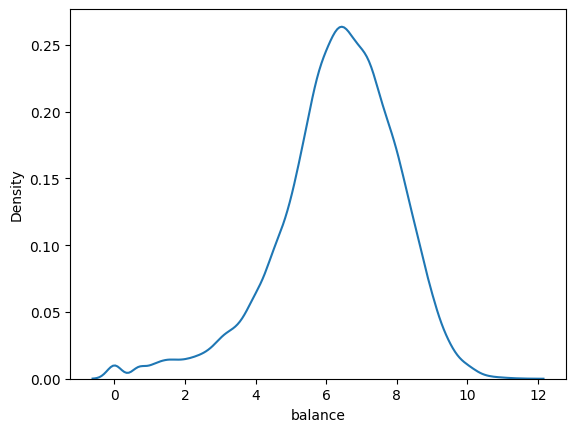

In [ ]:
import numpy as np
import seaborn as sns

sns.kdeplot(np.log(df_b['balance'])) #Basis Logaritma dalam bilang e (2.718...) ln(x)

In [ ]:
df_b["log_balance"] = np.log(df_b["balance"])

In [ ]:
df_b[["balance","log_balance"]]

,balance,log_balance
0,2143,7.669962
1,29,3.367296
2,2,0.693147
3,1506,7.317212
4,1,0.000000
...,...,...
45206,825,6.715383
45207,1729,7.455298
45208,5715,8.650850
45209,668,6.504288


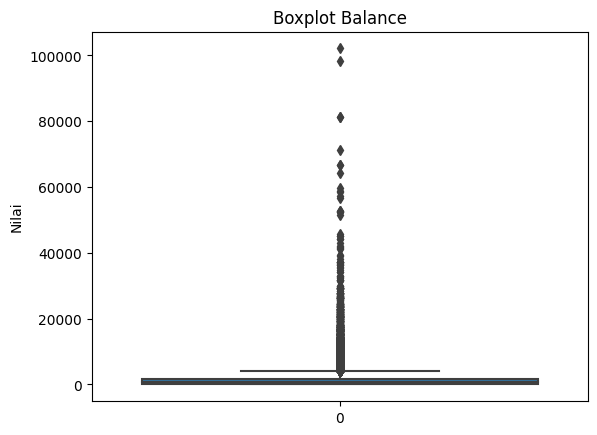

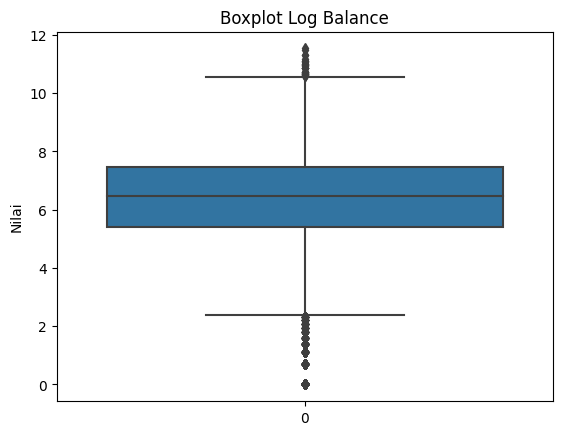

In [ ]:
#Perbandingan boxplot balance dan balance yang telah ditransformasi
from matplotlib import pyplot as plt
import seaborn as sns

sns.boxplot(df_b["balance"])
plt.title('Boxplot Balance')
plt.ylabel('Nilai')
plt.show()

sns.boxplot(df_b["log_balance"])
plt.title('Boxplot Log Balance')
plt.ylabel('Nilai')
plt.show()

In [ ]:
df_b.describe()

,age,balance,day,duration,campaign,pdays,previous,log_balance
count,37931.000000,37931.000000,37931.000000,37931.000000,37931.000000,37931.000000,37931.000000,37931.000000
mean,40.985025,1655.270254,15.695790,259.879386,2.718542,41.976510,0.615091,6.323196
std,10.762390,3240.126649,8.283239,259.235650,2.988197,101.584743,2.419962,1.702197
min,18.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,226.500000,8.000000,104.000000,1.000000,-1.000000,0.000000,5.422743
50%,39.000000,644.000000,16.000000,181.000000,2.000000,-1.000000,0.000000,6.467699
75%,49.000000,1776.000000,21.000000,322.000000,3.000000,-1.000000,0.000000,7.482119
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,11.533972


In [ ]:
df_b[df_b["log_balance"] >= 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,log_balance
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,7.669962
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,3.367296
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0.693147
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,7.317212
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,6.715383
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,7.455298
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,8.650850
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,6.504288


### Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

df_b['campaign_norm'] = minmax_scaler.fit_transform(df_b[['campaign']]) #Normalisasi

In [ ]:
df_b[['campaign', 'campaign_norm']].describe()

,campaign,campaign_norm
count,45211.000000,45211.000000
mean,2.763841,0.028449
std,3.098021,0.049968
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.016129
75%,3.000000,0.032258
max,63.000000,1.000000


## Handle Outlier

In [ ]:
import numpy as np
from scipy import stats

df_c = df_b.copy() #Mengcopy data yang telah di Transformasi

df_c["z_scores"] = np.abs(stats.zscore(df_c['balance'])) #Membuat kolom z_score

df_c.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,log_balance,z_scores
24371,53,admin.,married,secondary,no,1661,yes,yes,cellular,17,nov,85,1,-1,0,unknown,no,7.415175,0.001768
40289,27,admin.,single,tertiary,no,138,no,no,cellular,15,jun,89,2,-1,0,unknown,yes,4.927254,0.468281
17324,41,technician,divorced,secondary,no,611,yes,no,cellular,28,jul,157,5,-1,0,unknown,no,6.415097,0.322297
16394,57,entrepreneur,married,tertiary,no,234,no,no,cellular,23,jul,169,2,-1,0,unknown,no,5.455321,0.438652
41667,54,management,single,tertiary,no,2081,no,no,cellular,1,oct,395,2,108,1,failure,no,7.640604,0.131395


In [ ]:
df_c.describe()

,age,balance,day,duration,campaign,pdays,previous,log_balance,z_scores
count,37931.000000,37931.000000,37931.000000,37931.000000,37931.000000,37931.000000,37931.000000,37931.000000,37931.000000
mean,40.985025,1655.270254,15.695790,259.879386,2.718542,41.976510,0.615091,6.323196,0.519034
std,10.762390,3240.126649,8.283239,259.235650,2.988197,101.584743,2.419962,1.702197,0.854765
min,18.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000083
25%,33.000000,226.500000,8.000000,104.000000,1.000000,-1.000000,0.000000,5.422743,0.254089
50%,39.000000,644.000000,16.000000,181.000000,2.000000,-1.000000,0.000000,6.467699,0.400382
75%,49.000000,1776.000000,21.000000,322.000000,3.000000,-1.000000,0.000000,7.482119,0.486182
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,11.533972,31.008990


In [ ]:
#zscore balance

zscore_balance = np.abs (stats.zscore(df_c['log_balance']))
filtered_balance = (zscore_balance < 3 )
df_d = df_c[filtered_balance]

print(f'Jumlah baris sebelum memfilter outlier: {len(df_c)}')
print(f'Jumlah baris sebelum memfilter outlier: {len(df_d)}')

Jumlah baris sebelum memfilter outlier: 37931
Jumlah baris sebelum memfilter outlier: 37444


Setelah dilakukannya penghapusan data dan transformasi data balance, maka selanjutnya adalah menghapus data balance yang outlier. Penghapusan outlier dilakukan dengan menggunakan Z score agar data yang dihapus tidak terlalu banyak. Setelah dilakukan filtered data outlier jumlah data yang tersisa adalah 37444.

## Feature Encoding

### Membuat Dummy Variabel Untuk Data Kategorikal
Data kategorikal perlu diolah agar dapat terbaca dalam model machine learning. Oleh sebab itu, dilakukan proses pengkodean variabel:
1. Dilakukan Pengkodean biner: job, marital, contact, poutcome
2. Dilakukan pemetaan pada data ordinal: education, month

#### Encoding Categorical (One-hot Encoding)

In [ ]:
# Proses Pengkodean Biner

df_e = df_d.copy()

pd.set_option('display.max_columns', 500)
for field in cats:
  df_e = pd.get_dummies(df_e, columns = [field], prefix = [field])
df_e

,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,log_balance,z_scores,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no,7.669962,0.150530,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,44,secondary,no,29,yes,no,5,may,151,1,-1,0,no,3.367296,0.501922,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
3,47,unknown,no,1506,yes,no,5,may,92,1,-1,0,no,7.317212,0.046070,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
5,35,tertiary,no,231,yes,no,5,may,139,1,-1,0,no,5.442418,0.439578,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
6,28,tertiary,no,447,yes,yes,5,may,217,1,-1,0,no,6.102559,0.372913,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,tertiary,no,825,no,no,17,nov,977,3,-1,0,yes,6.715383,0.256250,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,primary,no,1729,no,no,17,nov,456,2,-1,0,yes,7.455298,0.022756,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
45208,72,secondary,no,5715,no,no,17,nov,1127,5,184,3,yes,8.650850,1.252971,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
45209,57,secondary,no,668,no,no,17,nov,508,4,-1,0,no,6.504288,0.304705,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


####Encoding Month (One-hot Encoding)

In [ ]:
# Melakukan one-hot encoding pada kolom 'month'
encoded_month = pd.get_dummies(df_e['month'], prefix='bulan')

# Menggabungkan hasil one-hot encoding dengan DataFrame asli
df_train_encoded = pd.concat([df_e, encoded_month], axis=1)
df_e = pd.concat([df_train_encoded], axis = 1)
df_e

,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,log_balance,z_scores,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,bulan_apr,bulan_aug,bulan_dec,bulan_feb,bulan_jan,bulan_jul,bulan_jun,bulan_mar,bulan_may,bulan_nov,bulan_oct,bulan_sep
0,58,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no,7.669962,0.150530,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,secondary,no,29,yes,no,5,may,151,1,-1,0,no,3.367296,0.501922,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,47,unknown,no,1506,yes,no,5,may,92,1,-1,0,no,7.317212,0.046070,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5,35,tertiary,no,231,yes,no,5,may,139,1,-1,0,no,5.442418,0.439578,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
6,28,tertiary,no,447,yes,yes,5,may,217,1,-1,0,no,6.102559,0.372913,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,tertiary,no,825,no,no,17,nov,977,3,-1,0,yes,6.715383,0.256250,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,primary,no,1729,no,no,17,nov,456,2,-1,0,yes,7.455298,0.022756,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,secondary,no,5715,no,no,17,nov,1127,5,184,3,yes,8.650850,1.252971,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,secondary,no,668,no,no,17,nov,508,4,-1,0,no,6.504288,0.304705,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


#### Encoding Ordinal (Label encoding)

In [ ]:
# mengubah nilai 'unknown' pada education dengan nilai modus ('secondary') dikarenakan presentase nya sangat sedikit (kurang dari 5%)

# Mendapatkan modus (nilai paling sering muncul) dari kolom 'education'
education_mode = df_e['education'].mode()[0]

# Mengganti seluruh nilai 'unknown' dengan modus
df_e['education'] = df_e['education'].replace('unknown', education_mode)
df_e['education'].describe()

count         37444
unique            3
top       secondary
freq          20485
Name: education, dtype: object

In [ ]:
# Pengkodean Data Ordinal
education_map = {"secondary": 2, "tertiary":3, "primary":1}
df_e.education = df_e.education.map(education_map)
df_e

,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,log_balance,campaign_norm,z_scores


In [ ]:
ratio = df_e[df_e["education"] == 0].count()/df_e["education"].count()
ratio["education"]

nan

Karena unknown telah diganti menjadi pendidikan yang sering muncul, maka edukasi tidak ada yang 0.

In [ ]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            0 non-null      int64  
 1   education      0 non-null      int64  
 2   default        0 non-null      object 
 3   balance        0 non-null      int64  
 4   housing        0 non-null      object 
 5   loan           0 non-null      object 
 6   day            0 non-null      int64  
 7   month          0 non-null      object 
 8   duration       0 non-null      int64  
 9   campaign       0 non-null      int64  
 10  pdays          0 non-null      int64  
 11  previous       0 non-null      int64  
 12  y              0 non-null      object 
 13  log_balance    0 non-null      float64
 14  campaign_norm  0 non-null      float64
 15  z_scores       0 non-null      float64
dtypes: float64(3), int64(8), object(5)
memory usage: 0.0+ bytes


#### Encoding Binary (Label encoding)

In [ ]:
# label encoding data binary (default, housing, loan, y)

df_f = df_e.copy()

mapping_default= {
    'yes' : 1,
    'no' : 0}

mapping_housing= {
    'yes' : 1,
    'no' : 0}

mapping_loan= {
    'yes' : 1,
    'no' : 0}

df_f.default = df_f.default.map(mapping_default)
df_f.housing = df_f.housing.map(mapping_housing)
df_f.loan = df_f.loan.map(mapping_loan)

In [ ]:
pd.set_option('display.max_columns', 500)
df_f

,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,log_balance,campaign_norm,z_scores


# Feature Engineering (35 Poin)

## Feature Extraction

In [ ]:
#Feature Engineering
df_g = df_f.copy()

# menandai nasabah yang baru dihubungi
df_g["new"] = np.where(df_g["pdays"] == -1, 1, 0)

# penggila ke nasabah terindikasi spam
df_g["spam"] = np.where(df_g["campaign"] >= 3, 1, 0)

# age
df_g["Gen Z"] = np.where(df_g["age"] <= 26, 1, 0)

# nasabah bawel
df_g["sassy"] = np.where(df_g["duration"] >= 600, 1, 0)

# nasabah punya tanggungan
df_g["dependent"] = np.where((df_g["housing"] == 1) | (df_g['loan'] == 1), 1, 0)

df_g

,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,log_balance,campaign_norm,z_scores,new,spam,Gen Z,sassy,dependent


<ipython-input-106-61035d48350a>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_g.corr(), cmap='Blues', annot=True, fmt='.2f')
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

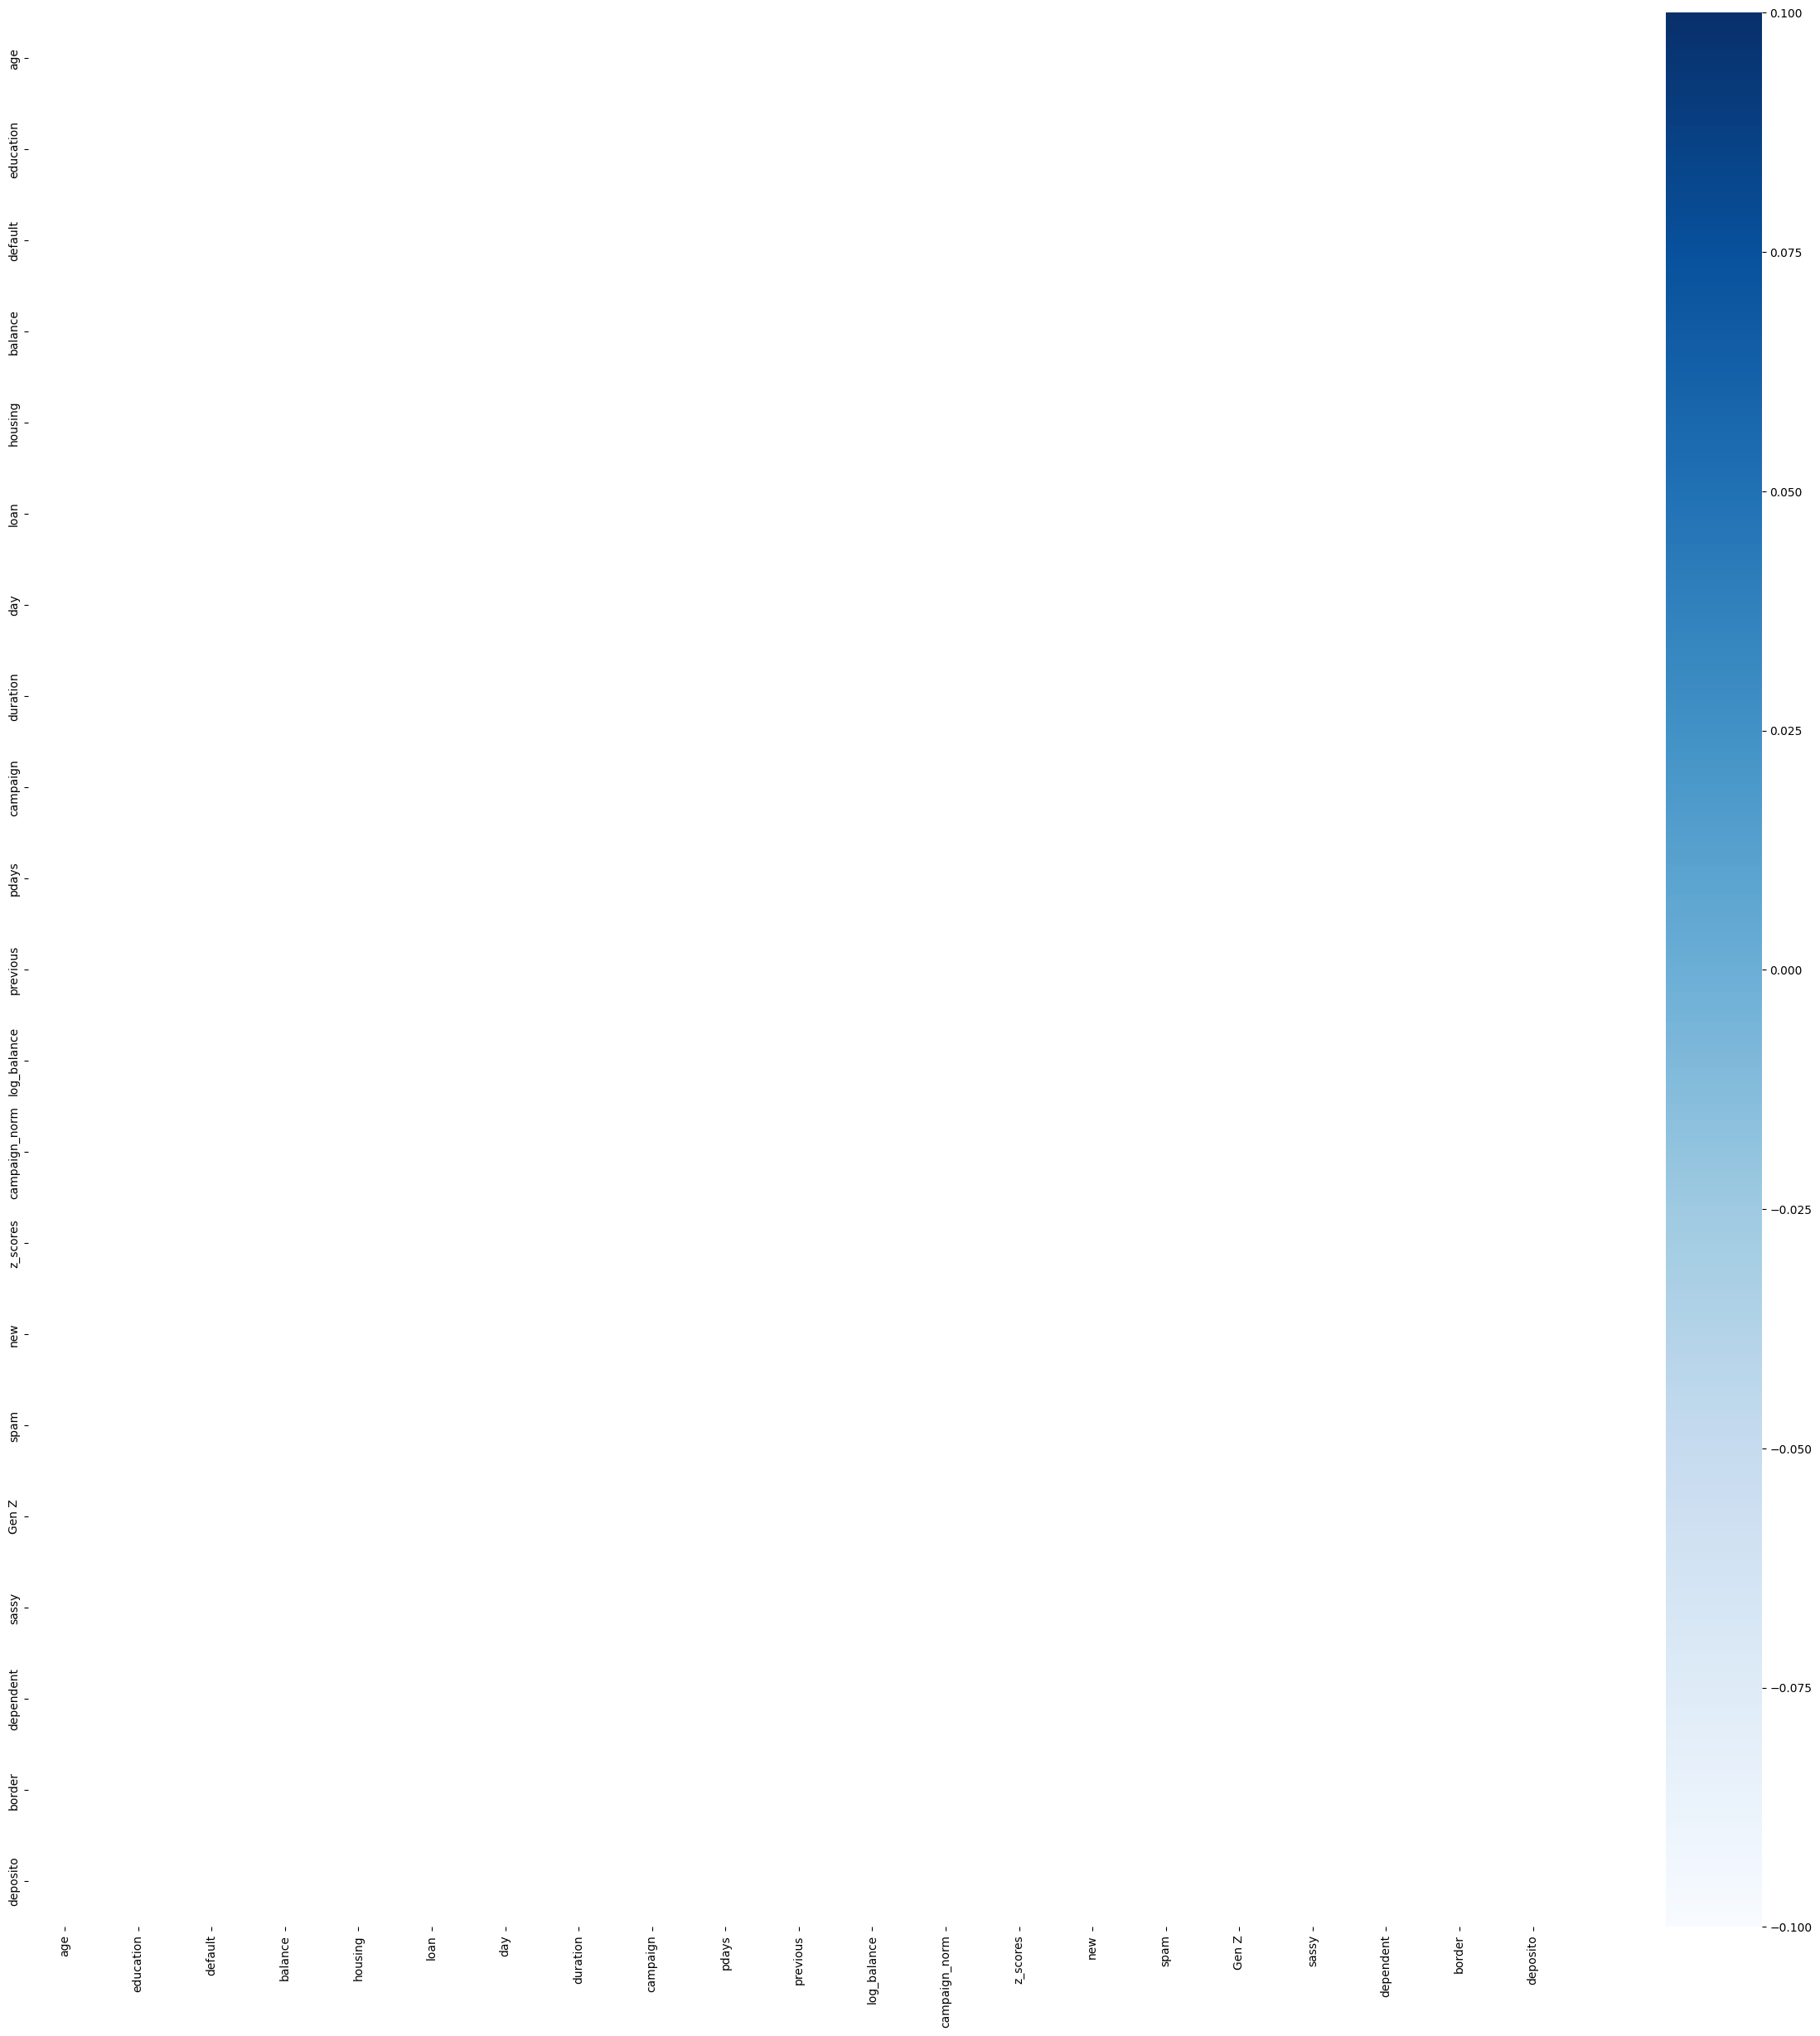

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

#making border for corr matrix
df_g["border"] = 0
df_g["deposito"] = np.where(df_g["y"] == "yes", 1, 0)

plt.figure(figsize=(30, 30))
sns.heatmap(df_g.corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
df_g

## Feature Selection
- membuang feature yang tidak relevan
- membuang feature yang redundant
- mengurangi fitur


**1. Selection Khusus pada Features yang sudah dilakukan extraction terlebih dahulu**


In [1]:
df_extraction_train = df_train[["log_balance", "balance", "pdays", "campaign", "new","age", "duration", "housing","loan", "in_debt","spam","Gen Z","sassy","dependent","border","deposito"]]

plt.figure(figsize=(10, 10))
sns.heatmap(df_extraction_train.corr(), cmap='Blues', annot=True, fmt='.2f')

NameError: ignored

**Insight**

** **threshold = 0.05**

1. Log_balance & balance = korelasi lumayan tinggi tapi masih dibawah 0.7, yaitu 0.59. akan **drop balace** karena korelasi nya di atas 0.05
2. campaign = spam korelasi dengan spam cukup tinggi, 0.61 .Tetapi akan tetap dipertahankan karena masih ingin melihat jumlah campaign normal
3. duration dan sassy = korelasi tinggi 0.77 akan **drop duration**

In [ ]:
#kita copy dulu biar ga risky
df_train_drop = df_train

#drop fitur balance, duration
columns_to_drop = ["balance", "duration"]
df_train_drop = df_train_drop.drop(columns_to_drop, axis=1)
df_train_drop

**Melihat korelasi yang di atas threshold (0.05)**

In [ ]:
#melihat korelasi

#making border for corr matrix
df_train_drop["border"] = None
df_train_drop["deposito"] = np.where(df_train["y"] == "yes", 1, 0)

#melihat korelasi
plt.figure(figsize=(30, 30))
correlation_matrix = df_train_drop.corr()
mask = correlation_matrix >= 0.05
sns.heatmap(correlation_matrix, cmap='Blues', annot=True, fmt='.2f', mask=mask)
plt.show()

In [ ]:
# Buat matriks korelasi
correlation_matrix = df_train_drop.corr()

# Ambang batas korelasi
threshold = 0.05

# Loop melalui matriks korelasi dan tampilkan fitur yang memiliki korelasi di atas ambang batas
highly_correlated_features = []
for feature in correlation_matrix.columns:
    correlated_features = list(correlation_matrix.index[correlation_matrix[feature] > threshold])
    for correlated_feature in correlated_features:
        if correlated_feature != feature:  # Hindari menambahkan fitur itu sendiri
            highly_correlated_features.append((feature, correlated_feature))

# Tampilkan daftar fitur yang memiliki korelasi di atas ambang batas
for feature_pair in highly_correlated_features:
    print(f"Highly correlated features: {feature_pair[0]} and {feature_pair[1]}")


List yang akan di drop karena berada di atas korelasi =

marital_divorced

job_self-employed

job_blue-collar  

job_services

contact_unknown

poutcome_unknown

day

previous

job_admin


In [ ]:
#drop fitur di atas korelasi 0.05 (marital_divorced  , job_self-employed , job_blue-collar, job_services, poutcome_unknown, day, previous, job_admin)

columns_to_drop = ["marital_divorced",  "job_self-employed", "job_blue-collar", "job_services", "contact_unknown", "poutcome_unknown", "day", "previous", "job_admin."]
df_train_drop = df_train_drop.drop(columns_to_drop, axis=1)
df_train_drop

# Masukan Mentor
1. Gunakan MinMax Scaler.
2. Belum mengcapture data untuk data test, harusnya dilakukan di awal.
3. Splitting train dan test, handdling imbalance.
4. Fit Transform untuk data train tapi hanya ditransform di data test.
5. Yang dihandling imbalance hanya untuk data train saja (test jangan).
6. Data train dan test tidak perlu saklek ikut kaggle.


# Handle Class Imbalance